In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
import statsmodels.api as sm
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, levene
from scipy.stats import ttest_1samp
from scipy.stats import shapiro, levene, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA VISUALIZATION/Final Project_BDTQDL/Co-Working Space for Coding/Data/gym_members_exercise_tracking.csv')

In [4]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Những người có kinh nghiệm luyện tập có xu hướng tập cân đối các bài tập

Những người entry và mid thì có sự chênh lệch nhất định giữa các bài tập

In [5]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [6]:
df.duplicated().sum()

0

# MULTIVARIATE ANALYSIS

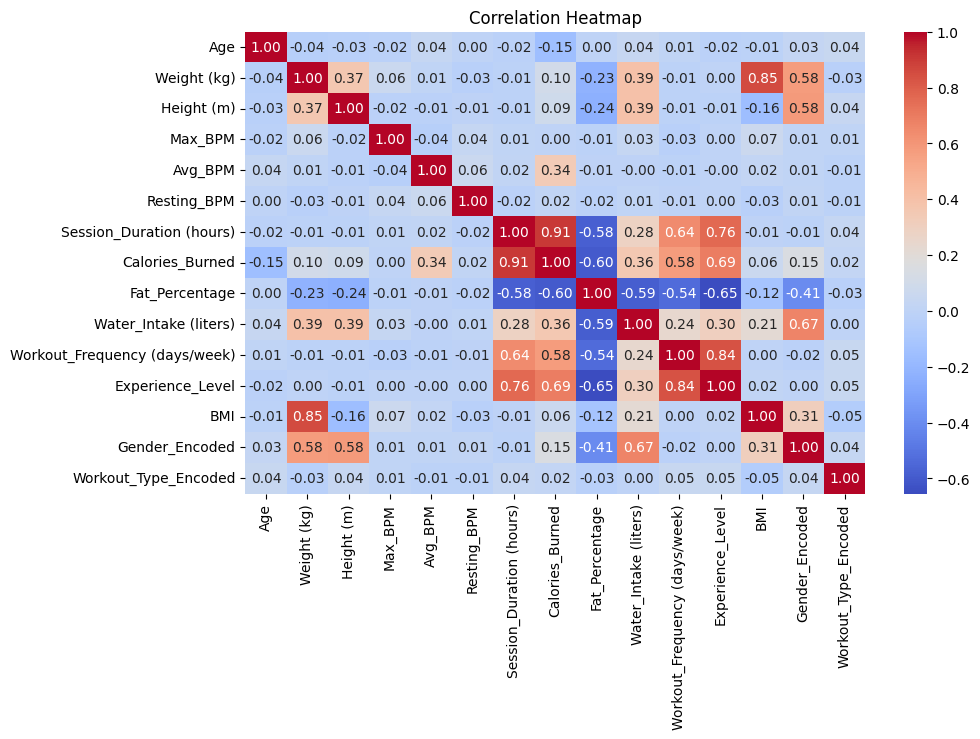

In [7]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the Gender column
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

# Apply Label Encoding to the Workout_Type column
df['Workout_Type_Encoded'] = le.fit_transform(df['Workout_Type'])

# Show the updated dataframe
df[['Gender', 'Gender_Encoded', 'Workout_Type', 'Workout_Type_Encoded']].head()
df_new= df.drop(columns=['Gender', 'Workout_Type'])
df_new.head()
corr = df_new.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Pairs of features with correlation |corr| > 0.50:
Calories_Burned           Session_Duration (hours)         0.908140
BMI                       Weight (kg)                      0.853158
Experience_Level          Workout_Frequency (days/week)    0.837079
                          Session_Duration (hours)         0.764768
Calories_Burned           Experience_Level                 0.694129
Gender_Encoded            Water_Intake (liters)            0.667658
Experience_Level          Fat_Percentage                  -0.654363
Session_Duration (hours)  Workout_Frequency (days/week)    0.644140
Calories_Burned           Fat_Percentage                  -0.597615
Fat_Percentage            Water_Intake (liters)           -0.588683
Gender_Encoded            Height (m)                       0.583503
Fat_Percentage            Session_Duration (hours)        -0.581520
Gender_Encoded            Weight (kg)                      0.579340
Calories_Burned           Workout_Frequency (days/week)    0.57615

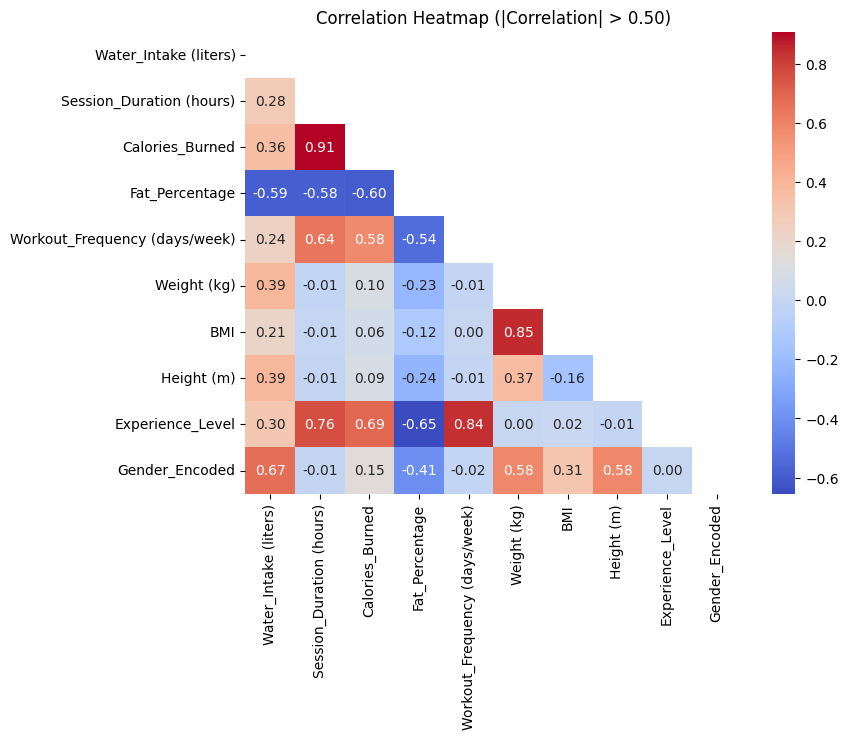

In [8]:
# Extract pairs of features with absolute correlation above the threshold
threshold = 0.50
correlation_pairs = corr.unstack()

# Convert indices to sorted tuples to remove duplicates
correlation_pairs = correlation_pairs[correlation_pairs.abs() > threshold]
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]
correlation_pairs.index = correlation_pairs.index.map(lambda x: tuple(sorted(x)))
correlation_pairs = correlation_pairs[~correlation_pairs.index.duplicated()]

# Sort pairs by absolute correlation value in descending order
sorted_high_corr_pairs = correlation_pairs.reindex(correlation_pairs.abs().sort_values(ascending=False).index)

# Display the pairs with strong correlation (positive or negative)
print("Pairs of features with correlation |corr| > 0.50:")
print(sorted_high_corr_pairs)

# Plot a focused heatmap with these highly correlated features
if not sorted_high_corr_pairs.empty:
    # Identify features involved in high correlation pairs
    high_corr_features = list(set([index[0] for index in sorted_high_corr_pairs.index] +
                                   [index[1] for index in sorted_high_corr_pairs.index]))
    focused_corr = corr.loc[high_corr_features, high_corr_features]

    plt.figure(figsize=(8, 6))
    sns.heatmap(focused_corr, annot=True, cmap='coolwarm', fmt='.2f', mask=np.triu(focused_corr))
    plt.title('Correlation Heatmap (|Correlation| > 0.50)')
    plt.show()
else:
    print("No pairs found with correlation |corr| > 0.50.")


## Heart rate & Calories Burned: Correlation = 0.34

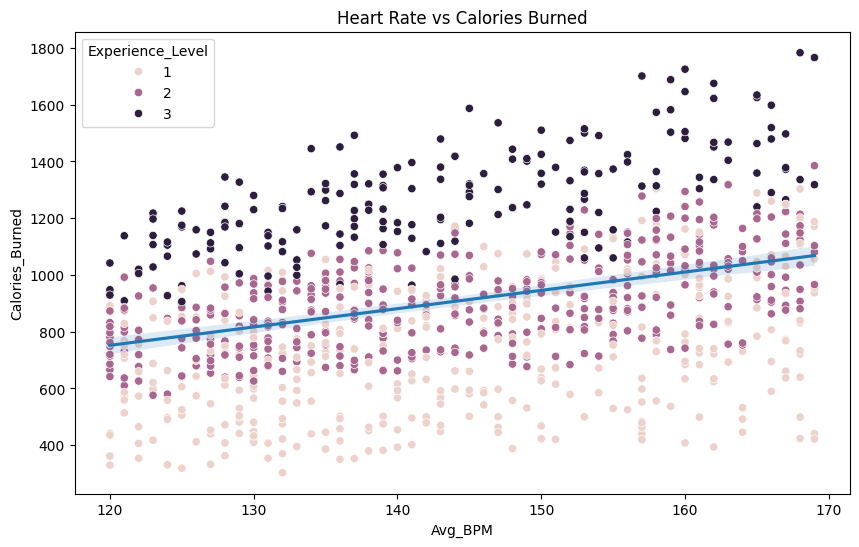

In [9]:
# heart rate vs calories burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_BPM', y='Calories_Burned', data=df, hue = 'Experience_Level')
sns.regplot(x='Avg_BPM', y='Calories_Burned', data=df, scatter=False)
plt.title('Heart Rate vs Calories Burned')
plt.show()

Chưa nhận xét được chỗ này

## Calories_Burned & Experience_Level: Correlation = 0.694129


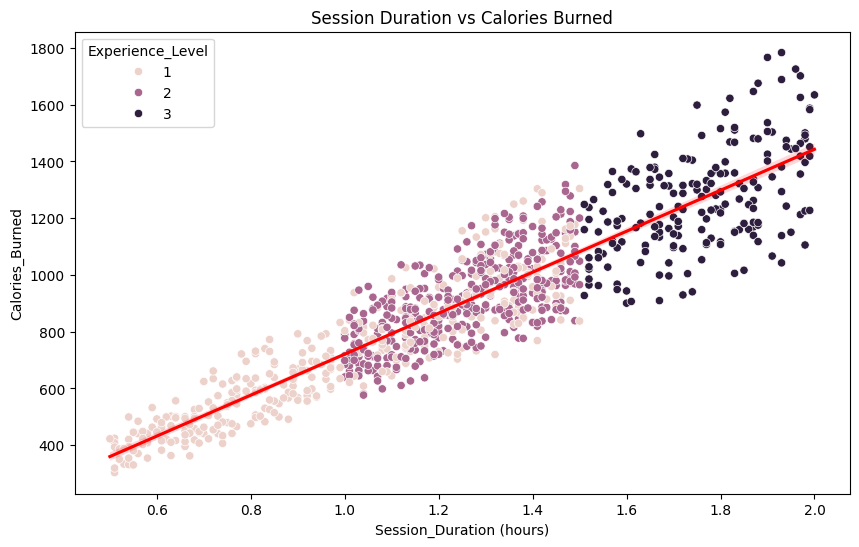

In [10]:
# correlation of session duration and calories burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', data=df, hue = 'Experience_Level')
sns.regplot(x='Session_Duration (hours)', y='Calories_Burned', data=df, scatter=False, color='red')
plt.title('Session Duration vs Calories Burned')
plt.show()

Có vẻ như tồn tại mối quan hệ tuyến tính giữa Session_Duration và Calories_Burned. Đồng thời khi quan sát Experience_Level ta cũng thấy rằng có sự tách biệt rõ ràng giữa những người tập có kinh nghiệm (3) so với những người mới bắt đầu hoặc mới tập luyện được 1 khoảng tgian (1-2). Nhóm người lv3 có thời gian tập luyện và đốt chạy được lượng calo nhiều hơn so với nhóm lv1 và lv2

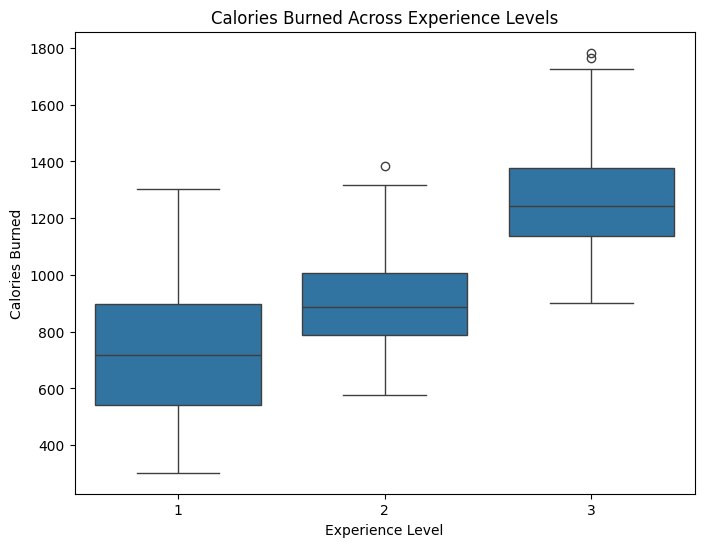

In [11]:
# Box plot for Experience Level vs Calories Burned
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned')

# Adding labels and title
plt.title('Calories Burned Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')

# Show the plot
plt.show()


Biểu diễn mối quan hệ giữa Experience_Level và Calories_Burned bằng box plot. Ta thấy rõ khoảng phân vị của level 3 cao hơn rất nhiều so với 2 level còn lại

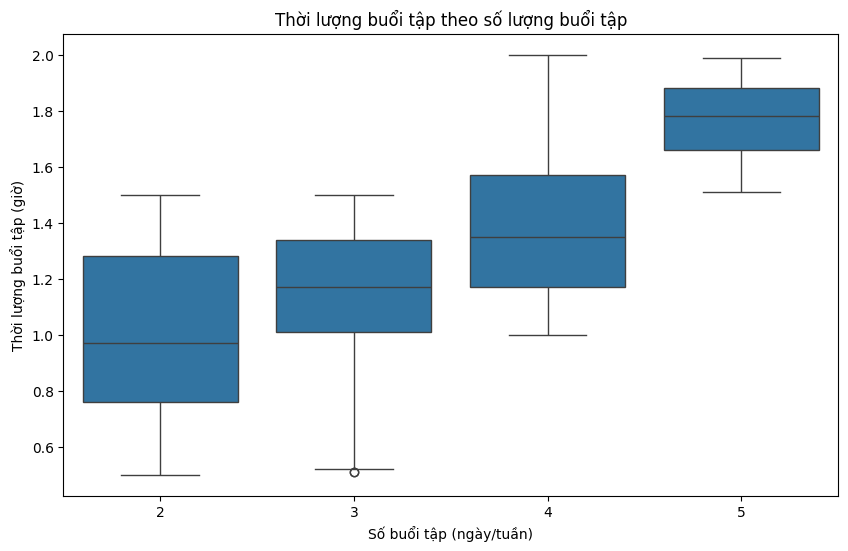

In [12]:
# Vẽ box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='Session_Duration (hours)')

# Thêm nhãn và tiêu đề
plt.title('Thời lượng buổi tập theo số lượng buổi tập')
plt.xlabel('Số buổi tập (ngày/tuần)')
plt.ylabel('Thời lượng buổi tập (giờ)')

# Hiển thị biểu đồ
plt.show()


## Calories_Burned & Water Intake: Correlation = 0.36

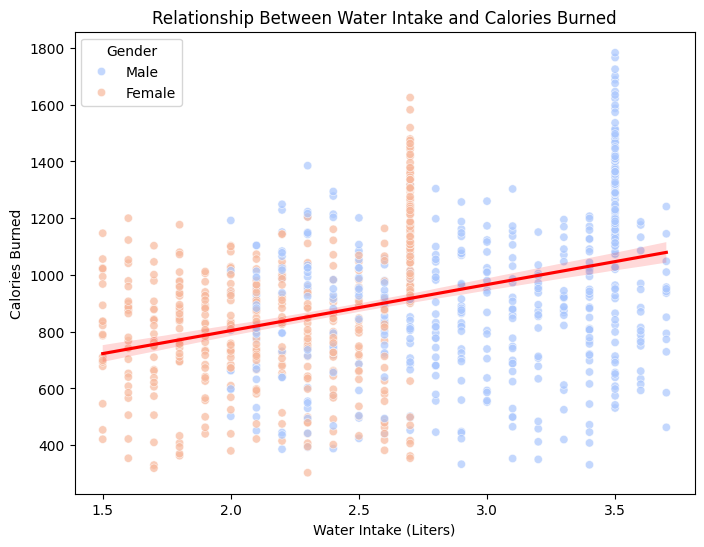

In [13]:
# Scatter plot for Water Intake vs Calories Burned
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Water_Intake (liters)', y='Calories_Burned', alpha=0.7, hue='Gender', palette='coolwarm')
sns.regplot(data=df, x='Water_Intake (liters)', y='Calories_Burned', scatter=False, color='red')
# Adding labels and title
plt.title('Relationship Between Water Intake and Calories Burned')
plt.xlabel('Water Intake (Liters)')
plt.ylabel('Calories Burned')
#plt.legend(title='Gender', labels=['Male', 'Female'])  # Update labels based on Gender_Encoded mapping if necessary

# Show the plot
plt.show()

Không có mối quan hệ tuyến tính rõ ràng giữa 2 biến này, cần kiểm định

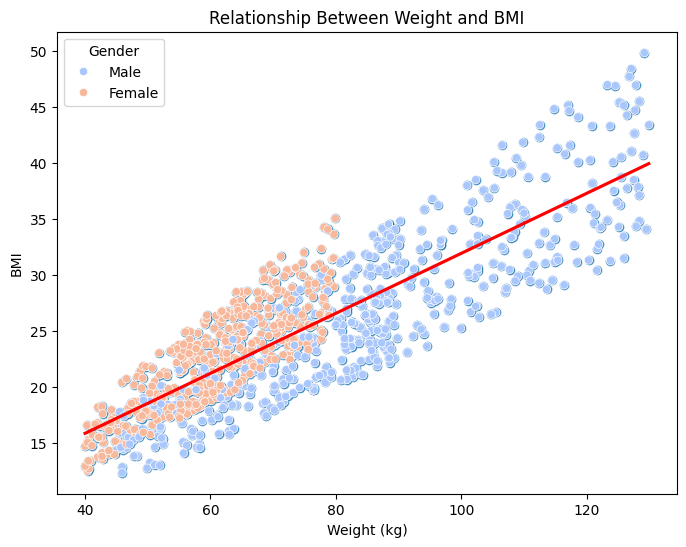

Correlation between Weight and BMI: 0.85


In [14]:
# Scatter plot with regression line for BMI vs Weight
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Weight (kg)', y='BMI', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}, ci=None)

sns.scatterplot(x='Weight (kg)', y='BMI', data=df, hue = 'Gender', palette='coolwarm')

# Adding labels and title
plt.title('Relationship Between Weight and BMI')
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')

# Show the plot
plt.show()

# Correlation analysis
correlation = df['Weight (kg)'].corr(df['BMI'])
print(f"Correlation between Weight and BMI: {correlation:.2f}")


\

<ipython-input-15-839c719bfc01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Experience_Level', y='Workout_Frequency (days/week)', palette='coolwarm', inner="quartile")


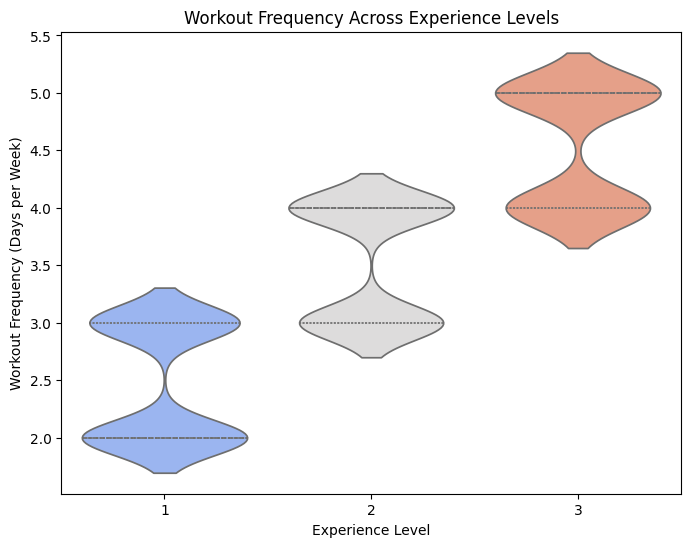

In [15]:
# Violin plot for Workout Frequency vs Experience Level
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Experience_Level', y='Workout_Frequency (days/week)', palette='coolwarm', inner="quartile")

# Adding labels and title
plt.title('Workout Frequency Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Workout Frequency (Days per Week)')

# Show the plot
plt.show()


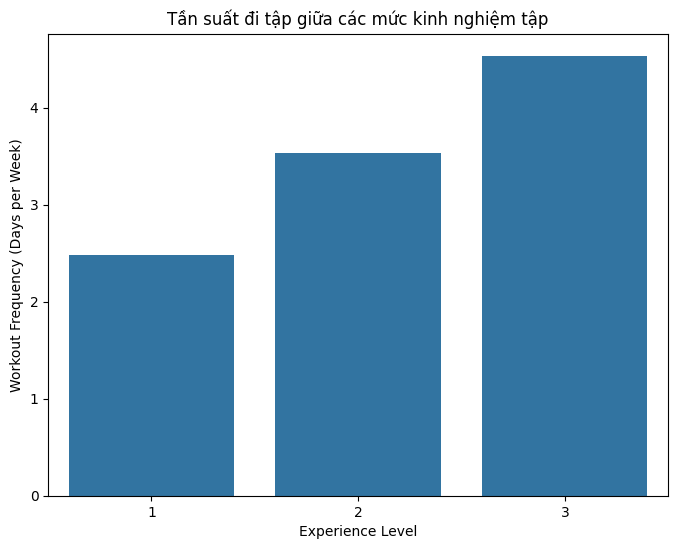

In [16]:
# Calculate the average workout frequency for each experience level
avg_workout_frequency = df.groupby('Experience_Level')['Workout_Frequency (days/week)'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_workout_frequency, x='Experience_Level', y='Workout_Frequency (days/week)')

# Adding labels and title
plt.title('Tần suất đi tập giữa các mức kinh nghiệm tập')
plt.xlabel('Experience Level')
plt.ylabel('Workout Frequency (Days per Week)')

# Show the plot
plt.show()


Những người có kinh nghiệm tập càng nhiều thì họ cũng càng có tần suất đi tập cao hơn.

Cần kiểm định chỗ này

<ipython-input-17-f1beb24d3cea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y='Fat_Percentage', palette='coolwarm')


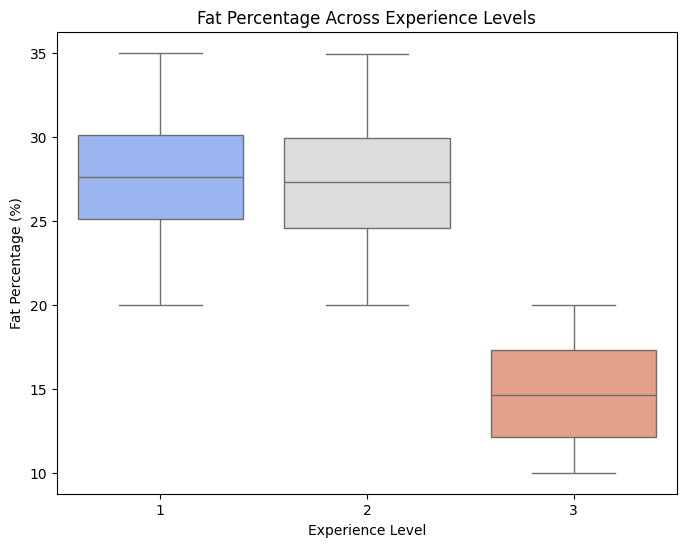

In [17]:
# Box plot for Fat Percentage vs Experience Level
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Experience_Level', y='Fat_Percentage', palette='coolwarm')

# Adding labels and title
plt.title('Fat Percentage Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Fat Percentage (%)')

# Show the plot
plt.show()

Những người có kinh nghiệm tập luyện thì có tỉ lệ mỡ cơ thể thấp

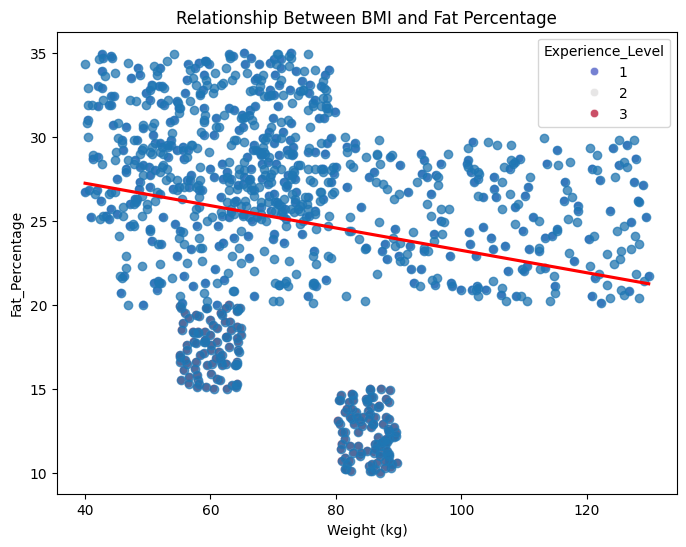

In [18]:
# Scatter plot for Fat Percentage vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Weight (kg)', y='Fat_Percentage', hue='Experience_Level', palette='coolwarm', alpha=0.7)

# Adding labels and title
plt.title('Relationship Between BMI and Fat Percentage')
plt.xlabel('BMI')
plt.ylabel('Fat Percentage (%)')

# Adding a trendline (optional)
sns.regplot(data=df, x='Weight (kg)', y='Fat_Percentage', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}, ci=None)

# Show the plot
plt.show()


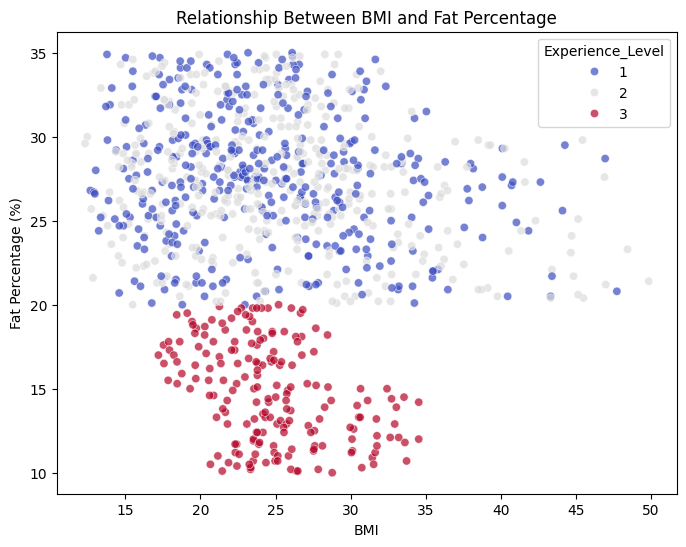

In [19]:
# Scatter plot for Fat Percentage vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='BMI', y='Fat_Percentage', hue='Experience_Level', palette='coolwarm', alpha=0.7)

# Adding labels and title
plt.title('Relationship Between BMI and Fat Percentage')
plt.xlabel('BMI')
plt.ylabel('Fat Percentage (%)')

# Adding a trendline (optional)

# Show the plot
plt.show()

Ta thấy rằng các chỉ số về thể trạng của nhóm người có kinh nghiệm là tốt hơn.



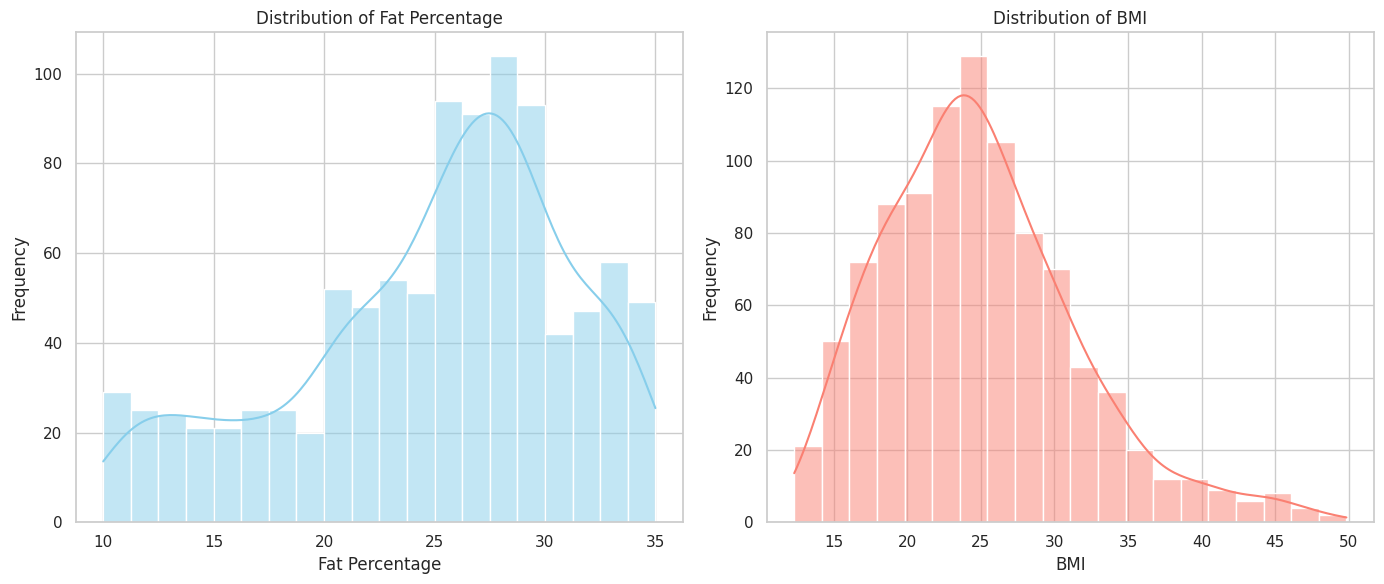

In [20]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for Fat_Percentage
sns.histplot(df['Fat_Percentage'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Fat Percentage')
axes[0].set_xlabel('Fat Percentage')
axes[0].set_ylabel('Frequency')

# Plot histogram for BMI
sns.histplot(df['BMI'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of BMI')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Ta có thể thấy sự đối lập giữa 2 biểu đồ

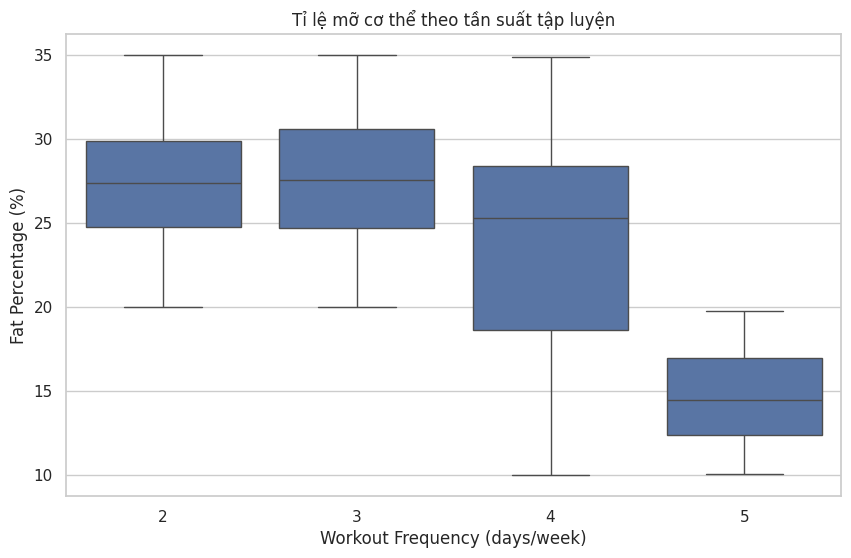

In [21]:
# Box plot for Fat Percentage vs Workout Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='Fat_Percentage')

# Adding labels and title
plt.title('Tỉ lệ mỡ cơ thể theo tần suất tập luyện')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Fat Percentage (%)')

# Display the plot
plt.show()

Nhóm người thường xuyên tập luyện chăm chỉ 5 buổi 1 tuần duy trì được lượng mỡ
rất thấp và khoảng biến thiên Fat_Percentage có biên độ nhỏ hơn rất nhiều so với các nhóm còn lại

## Biểu đồ tỉ lệ mỡ và cân nặng

Hệ số tương quan Pearson: -0.23, p-value: 0.0000
Bác bỏ H0: Có mối tương quan đáng kể giữa tỉ lệ mỡ trong cơ thể và cân nặng.


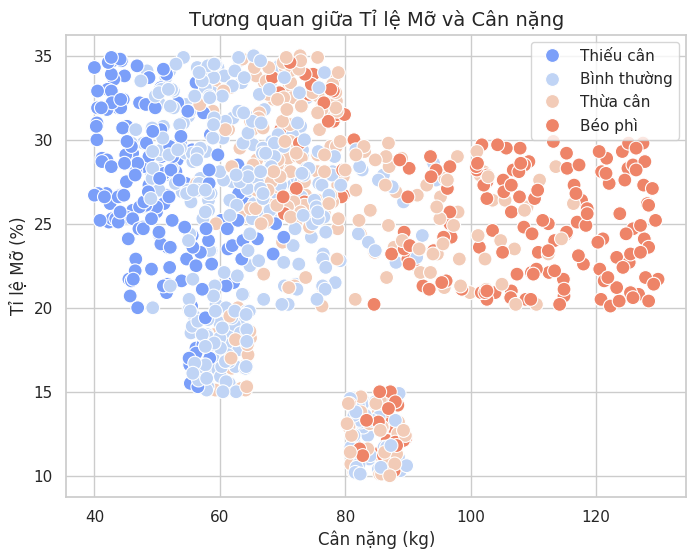

In [32]:
# Vẽ biểu đồ scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Weight (kg)', y='Fat_Percentage', hue='BMI_group', palette='coolwarm', s=100)

# Thêm đường hồi quy

# Thêm nhãn và tiêu đề
plt.title('Tương quan giữa Tỉ lệ Mỡ và Cân nặng', fontsize=14)
plt.xlabel('Cân nặng (kg)', fontsize=12)
plt.ylabel('Tỉ lệ Mỡ (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## So sánh các nhóm tuổi theo chỉ số BMI

In [28]:
df['BMI_group'] = pd.cut(df['BMI'], [0, 18.5, 24.9, 30, np.inf], labels = ['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì'])

In [29]:
df['Age_group'] = pd.cut(df['Age'], [0, 30, 50, np.inf], labels = ['Thanh niên', 'Trung niên', ' Cao tuổi'])

<ipython-input-30-8d6f46136bac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bmi_counts = df.groupby(['Age_group', 'BMI_group']).size().unstack()


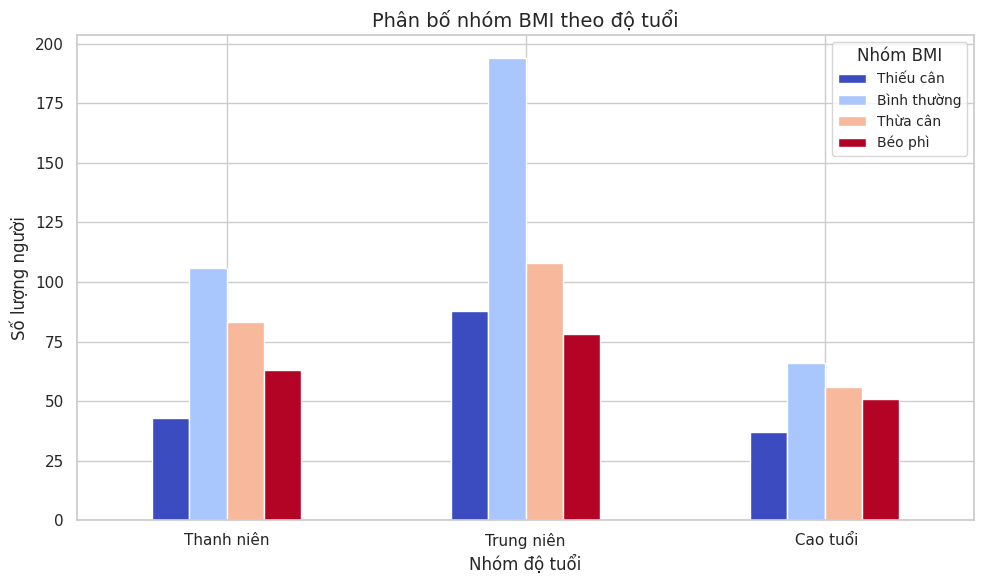

In [30]:
# Tính toán tần suất số lượng người theo từng nhóm độ tuổi và BMI
age_bmi_counts = df.groupby(['Age_group', 'BMI_group']).size().unstack()

# Vẽ biểu đồ cột ghép
age_bmi_counts.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='coolwarm')

# Thêm nhãn và tiêu đề
plt.title('Phân bố nhóm BMI theo độ tuổi', fontsize=14)
plt.xlabel('Nhóm độ tuổi', fontsize=12)
plt.ylabel('Số lượng người', fontsize=12)
plt.xticks(rotation=0)  # Giữ nhãn trục x nằm ngang
plt.legend(title='Nhóm BMI', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


# HYPOTHESIS TESTING

## Kiểm định sự ảnh hưởng của tần suất tập luyện đến lượng mỡ trong cơ thể
H₀: Trung bình Fat Percentage không có sự khác biệt giữa các nhóm Workout Frequency.

Hay nói cách khác, việc tập luyện với tần suất khác nhau không ảnh hưởng đến lượng mỡ cơ thể.

H₁: Trung bình Fat Percentage có sự khác biệt đáng kể giữa ít nhất hai nhóm Workout Frequency.

Tức là tần suất tập luyện có ảnh hưởng đến lượng mỡ cơ thể.

In [22]:
# Giả định: Workout_Frequency có các giá trị phân loại (ví dụ: 1, 2, 3, ...)
# Chia dữ liệu theo các nhóm Workout Frequency
groups = [df[df['Workout_Frequency (days/week)'] == freq]['Fat_Percentage'] for freq in df['Workout_Frequency (days/week)'].unique()]

# Kiểm định ANOVA
anova_stat, p_value = f_oneway(*groups)

# Kết quả kiểm định
print(f"ANOVA statistic: {anova_stat:.2f}, p-value: {p_value:.4f}")

# Đánh giá kết quả
alpha = 0.05  # Mức ý nghĩa
if p_value < alpha:
    print("Có sự khác biệt đáng kể về Fat Percentage giữa các nhóm Workout Frequency.")
else:
    print("Không có sự khác biệt đáng kể về Fat Percentage giữa các nhóm Workout Frequency.")

ANOVA statistic: 211.52, p-value: 0.0000
Có sự khác biệt đáng kể về Fat Percentage giữa các nhóm Workout Frequency.


## Kiểm định sự tương quan tuyến tính của BMI và lượng mỡ cơ thể
H₀: Không có mối tương quan tuyến tính giữa BMI và Fat Percentage.
Hệ số tương quan Pearson (ρ) = 0.

H₁: Có mối tương quan tuyến tính đáng kể giữa BMI và Fat Percentage.
Hệ số tương quan Pearson (ρ) ≠ 0.

In [23]:
# Kiểm định tương quan Pearson
corr, p_value = pearsonr(df['Weight (kg)'], df['Fat_Percentage'])

# Kết quả kiểm định
print(f"Hệ số tương quan Pearson: {corr:.2f}, p-value: {p_value:.4f}")
print('Kết luận:')
# Đánh giá kết quả
if p_value < 0.05:
    print("Bác bỏ giả thuyết H0. Có mối tương quan đáng kể giữa BMI và Fat Percentage.")
else:
    print("Chưa bác bỏ giả thuyết H0. Không có mối tương quan đáng kể giữa BMI và Fat Percentage.")


Hệ số tương quan Pearson: -0.23, p-value: 0.0000
Kết luận:
Bác bỏ giả thuyết H0. Có mối tương quan đáng kể giữa BMI và Fat Percentage.


## Kiểm định One-Way ANOVA sự khác biệt về lượng mỡ cơ thể giữa kinh nghiệm người tập
H₀: Trung bình Fat Percentage không có sự khác biệt giữa các mức của Experience Level.

Hay nói cách khác, mức độ kinh nghiệm (1, 2, 3) không ảnh hưởng đến tỷ lệ mỡ cơ thể.

H₁: Trung bình Fat Percentage có sự khác biệt đáng kể giữa ít nhất hai nhóm Experience Level.

Hay nói cách khác, mức độ kinh nghiệm ảnh hưởng đến tỷ lệ mỡ cơ thể.

In [25]:
# Giả định: Experience_Level có các mức phân loại (1, 2, 3)
groups = [df[df['Experience_Level'] == level]['Fat_Percentage'] for level in df['Experience_Level'].unique()]

# Kiểm định ANOVA
anova_stat, p_value = f_oneway(*groups)

# Kết quả kiểm định
print(f"ANOVA statistic: {anova_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Có sự khác biệt đáng kể về Fat Percentage giữa các nhóm Experience Level.")
else:
    print("Không có sự khác biệt đáng kể về Fat Percentage giữa các nhóm Experience Level.")


ANOVA statistic: 892.97, p-value: 0.0000
Có sự khác biệt đáng kể về Fat Percentage giữa các nhóm Experience Level.


## Kiểm định Chi-square về mối quan hệ giữa Expericen_Level và Workout_Frequency

In [26]:
# Tạo bảng tần suất giữa Experience Level và Workout Frequency
contingency_table = pd.crosstab(df['Experience_Level'], df['Workout_Frequency (days/week)'])

# Kiểm định Chi-squared
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Kết quả kiểm định
print(f"Chi-squared statistic: {chi2:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Có mối quan hệ đáng kể giữa Experience Level và Workout Frequency.")
else:
    print("Không có mối quan hệ đáng kể giữa Experience Level và Workout Frequency.")

Chi-squared statistic: 1015.00, p-value: 0.0000
Có mối quan hệ đáng kể giữa Experience Level và Workout Frequency.


## Kiểm định Tương quan Pearson giữa Session Duration và Calories Burned

In [27]:
# Tính hệ số tương quan Pearson
corr, p_value = pearsonr(df['Session_Duration (hours)'], df['Calories_Burned'])

# In kết quả
print(f"Hệ số tương quan Pearson: {corr:.2f}")
print(f"p-value: {p_value:.4f}")

# Đánh giá kết quả
alpha = 0.05
if p_value < alpha:
    print("Kết luận: Có mối tương quan tuyến tính đáng kể giữa Session Duration và Calories Burned.")
else:
    print("Kết luận: Không có mối tương quan tuyến tính đáng kể giữa Session Duration và Calories Burned.")


Hệ số tương quan Pearson: 0.91
p-value: 0.0000
Kết luận: Có mối tương quan tuyến tính đáng kể giữa Session Duration và Calories Burned.


## Kiểm định trung bình số buổi tập

In [33]:
# Lấy dữ liệu số buổi tập mỗi tuần
workout_frequency = df['Workout_Frequency (days/week)']

# Thực hiện kiểm định t-test một mẫu
t_stat, p_value = ttest_1samp(workout_frequency, popmean=3)

# Kết quả kiểm định
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

# Đánh giá kết quả
alpha = 0.05  # Mức ý nghĩa
if p_value < alpha:
    print("Bác bỏ H0: Trung bình số buổi tập mỗi tuần khác 3.")
else:
    print("Không đủ bằng chứng để bác bỏ H0: Trung bình số buổi tập mỗi tuần bằng 3.")


T-statistic: 10.99, p-value: 0.0000
Bác bỏ H0: Trung bình số buổi tập mỗi tuần khác 3.


# Kiểm định sự khác nhau về lượng calories burned giữa các nhóm Workout_Type

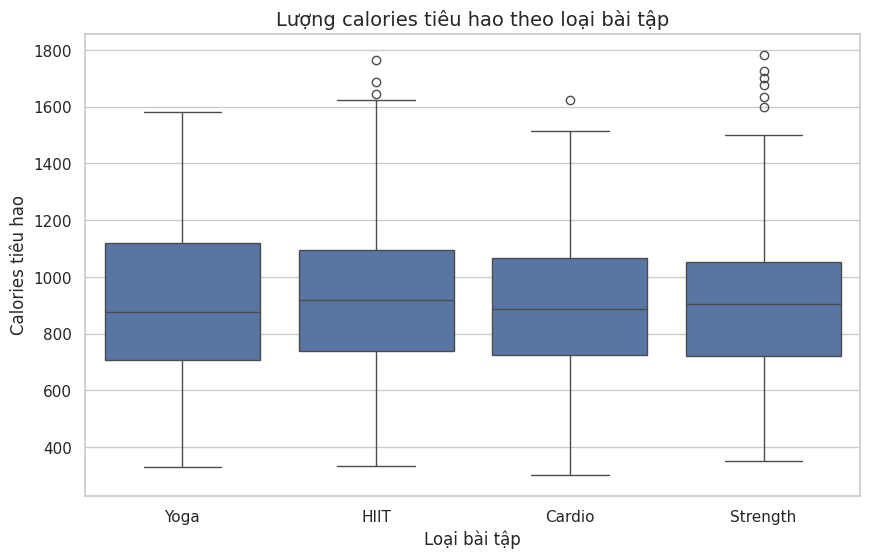

In [45]:
# Tách dữ liệu calories burned theo từng loại bài tập
calories_cardio = df[df['Workout_Type'] == 'Cardio']['Calories_Burned']
calories_strength = df[df['Workout_Type'] == 'Strength']['Calories_Burned']
calories_yoga = df[df['Workout_Type'] == 'Yoga']['Calories_Burned']

# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned')

# Thêm tiêu đề và nhãn
plt.title('Lượng calories tiêu hao theo loại bài tập', fontsize=14)
plt.xlabel('Loại bài tập', fontsize=12)
plt.ylabel('Calories tiêu hao', fontsize=12)

# Hiển thị biểu đồ
plt.show()



In [37]:
# Kiểm tra tính chuẩn của từng nhóm
for group in df['Workout_Type'].unique():
    stat, p_value = shapiro(df[df['Workout_Type'] == group]['Calories_Burned'])
    print(f"Nhóm {group}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"Dữ liệu của nhóm {group} không tuân theo phân phối chuẩn.")
    else:
        print(f"Dữ liệu của nhóm {group} tuân theo phân phối chuẩn.")
from scipy.stats import levene

# Kiểm tra phương sai đồng nhất giữa các nhóm
stat, p_value = levene(
    *[df[df['Workout_Type'] == group]['Calories_Burned'] for group in df['Workout_Type'].unique()]
)
print('--' * 20)
print(f"Kiểm định Levene: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Phương sai giữa các nhóm không đồng nhất.")
else:
    print("Phương sai giữa các nhóm đồng nhất.")

Nhóm Yoga: p-value = 0.0112
Dữ liệu của nhóm Yoga không tuân theo phân phối chuẩn.
Nhóm HIIT: p-value = 0.0375
Dữ liệu của nhóm HIIT không tuân theo phân phối chuẩn.
Nhóm Cardio: p-value = 0.0511
Dữ liệu của nhóm Cardio tuân theo phân phối chuẩn.
Nhóm Strength: p-value = 0.0012
Dữ liệu của nhóm Strength không tuân theo phân phối chuẩn.
----------------------------------------
Kiểm định Levene: p-value = 0.7890
Phương sai giữa các nhóm đồng nhất.


In [39]:
# Chuẩn bị dữ liệu cho các nhóm
groups = [df[df['Workout_Type'] == group]['Calories_Burned'] for group in df['Workout_Type'].unique()]

# Kiểm định Kruskal-Wallis
stat, p_value = kruskal(*groups)

# Kết quả kiểm định
print(f"Kruskal-Wallis statistic: {stat:.2f}, p-value: {p_value:.4f}")

# Đánh giá kết quả
if p_value < 0.05:
    print("Có sự khác biệt đáng kể về Calories Burned giữa các nhóm Workout_Type.")
else:
    print("Không có sự khác biệt đáng kể về Calories Burned giữa các nhóm Workout_Type.")


Kruskal-Wallis statistic: 1.48, p-value: 0.6860
Không có sự khác biệt đáng kể về Calories Burned giữa các nhóm Workout_Type.


# Kiểm định sự khác nhau về lượng mỡ giữa các nhóm có tần suất tập luyện khác nhau

In [40]:
# Kiểm tra tính chuẩn của từng nhóm
for group in df['Workout_Frequency (days/week)'].unique():
    stat, p_value = shapiro(df[df['Workout_Frequency (days/week)'] == group]['Fat_Percentage'])
    print(f"Nhóm {group}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"Dữ liệu của nhóm {group} (days/week) không tuân theo phân phối chuẩn.")
    else:
        print(f"Dữ liệu của nhóm {group} tuân theo phân phối chuẩn.")
from scipy.stats import levene

# Kiểm tra phương sai đồng nhất giữa các nhóm
stat, p_value = levene(
    *[df[df['Workout_Frequency (days/week)'] == group]['Fat_Percentage'] for group in df['Workout_Frequency (days/week)'].unique()]
)
print('--' * 20)
print(f"Kiểm định Levene: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Phương sai giữa các nhóm không đồng nhất.")
else:
    print("Phương sai giữa các nhóm đồng nhất.")

Nhóm 4: p-value = 0.0000
Dữ liệu của nhóm 4 (days/week) không tuân theo phân phối chuẩn.
Nhóm 3: p-value = 0.0000
Dữ liệu của nhóm 3 (days/week) không tuân theo phân phối chuẩn.
Nhóm 5: p-value = 0.0011
Dữ liệu của nhóm 5 (days/week) không tuân theo phân phối chuẩn.
Nhóm 2: p-value = 0.0011
Dữ liệu của nhóm 2 (days/week) không tuân theo phân phối chuẩn.
----------------------------------------
Kiểm định Levene: p-value = 0.0000
Phương sai giữa các nhóm không đồng nhất.


In [41]:
# Tạo các nhóm dữ liệu theo tần suất tập luyện
groups = [df[df['Workout_Frequency (days/week)'] == freq]['Fat_Percentage']
          for freq in df['Workout_Frequency (days/week)'].unique()]

# Thực hiện kiểm định Kruskal-Wallis H Test
kruskal_stat, p_value = kruskal(*groups)

# Kết quả kiểm định
print(f"Kruskal-Wallis H Test statistic: {kruskal_stat:.2f}, p-value: {p_value:.4f}")

# Đánh giá kết quả
alpha = 0.05  # Mức ý nghĩa
if p_value < alpha:
    print("Có sự khác biệt đáng kể về Fat Percentage giữa các nhóm Workout Frequency.")
else:
    print("Không có sự khác biệt đáng kể về Fat Percentage giữa các nhóm Workout Frequency.")


Kruskal-Wallis H Test statistic: 282.66, p-value: 0.0000
Có sự khác biệt đáng kể về Fat Percentage giữa các nhóm Workout Frequency.
